In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
from sklearn.metrics import rand_score,adjusted_rand_score,davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score

In [67]:
x=load_iris()['data']
y=load_iris()['target']

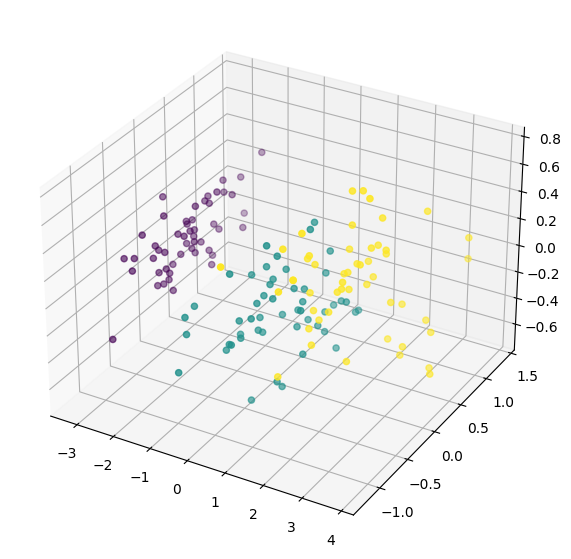

In [68]:
n=3
pca=PCA(n_components=n)
x1=pd.DataFrame(pca.fit_transform(x),columns=["PC{}".format(i) for i in range(1,n+1)])
fig = plt.figure(figsize = (10, 7))
ax = plt.axes (projection ="3d")
ax.scatter3D(x1[ "PC1" ],x1[ "PC2" ],x1["PC3"], c=y)

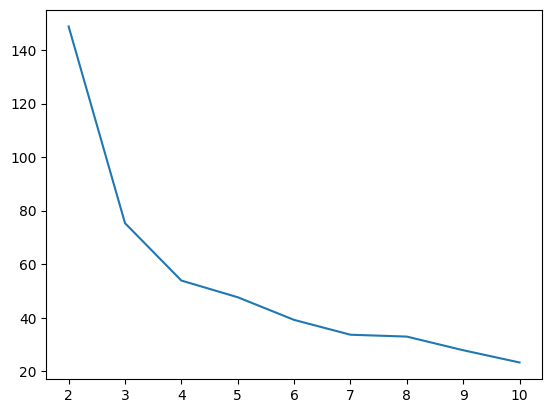

In [9]:
AV_INTRA_CLD=[]
for k in range(2,11):
  model=KMeans(n_clusters=k, n_init=1)
  labels=model.fit_predict(x1)
  AV_INTRA_CLD+=[model.inertia_]
plt.plot(np.array(range(2,11)), AV_INTRA_CLD)

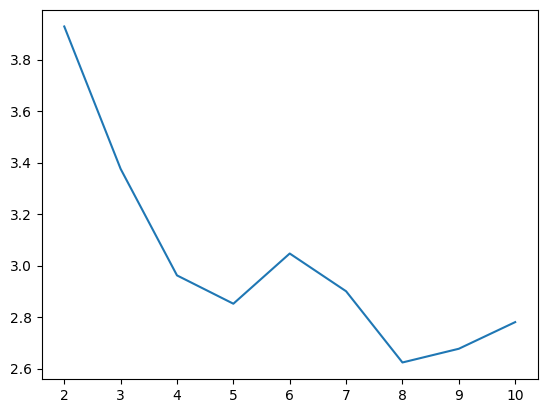

In [20]:
AV_INTER_CLD=[]
for k in range(2,11):
  model=KMeans(n_clusters=k, n_init=1)
  labels=model.fit_predict(x1)
  AV_INTER_CLD+=[np.mean(euclidean_distances(model.cluster_centers_)[np.triu_indices(n=k, k=1)])]
plt.plot(np.array(range(2,11)), AV_INTER_CLD)

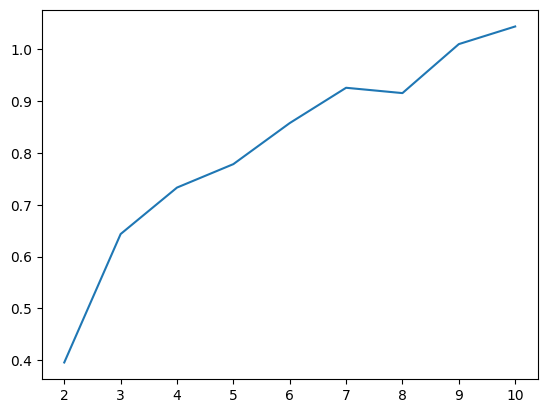

In [19]:
DB=[]
for k in range(2,11):
  model=KMeans(n_clusters=k, n_init=1)
  labels=model.fit_predict(x1)
  DB+=[davies_bouldin_score(x1, labels)]
plt.plot(np.array(range(2,11)), DB)

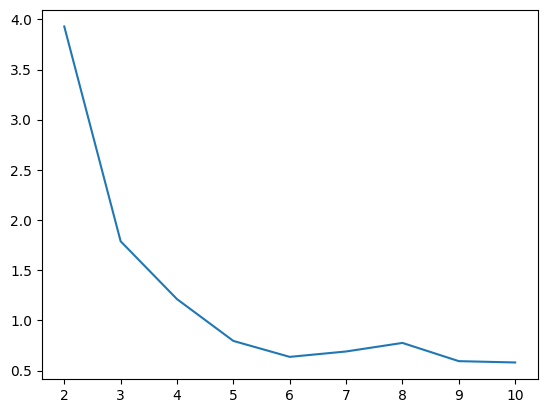

In [23]:
MIN_INTER_CLD=[]
for k in range(2,11):
  model=KMeans(n_clusters=k, n_init=1)
  labels=model.fit_predict(x1)
  MIN_INTER_CLD+=[min(euclidean_distances(model.cluster_centers_)[np.triu_indices(n=k, k=1)])]
plt.plot(np.array(range(2,11)), MIN_INTER_CLD)

In [37]:
np.repeat(model.cluster_centers_[0].reshape(1, 3), len(x1[labels==0]), axis=0)

array([[-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319],
       [-0.22723341, -0.72420135, -0.15708319]])

In [42]:
model.cluster_centers_[0].reshape(1, 3)

array([[-0.22723341, -0.72420135, -0.15708319]])

In [56]:
np.mean(euclidean_distances(np.vstack((model.cluster_centers_[0].reshape(1, 3), x1[labels==9].values)))[0, 1:])

1.5584297618447838

In [41]:
x1[labels==0]

,PC1,PC2,PC3
53,0.183318,-0.827959,-0.179591
57,-0.749123,-1.004891,0.012303
59,-0.008745,-0.723082,0.281141
60,-0.507841,-1.265971,-0.269817
62,0.264977,-0.550036,-0.694147
64,-0.173925,-0.254854,0.090458
69,0.045227,-0.583834,-0.235002
79,-0.305584,-0.368262,-0.318492
80,-0.068126,-0.705172,-0.244214
81,-0.189622,-0.680287,-0.306421


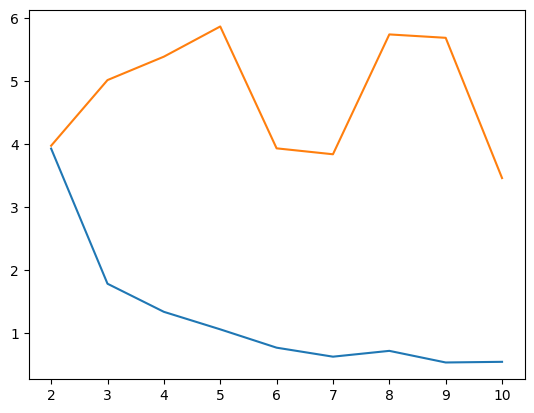

In [89]:
MIN_INTER_CLD=[]
MAX_INTRA_CLD=[]
for k in range(2,11):
  model=KMeans(n_clusters=k, n_init=1)
  labels=model.fit_predict(x1)
  intra_cl_d=[]
  for i in range(k):
    intra_cl_d+=[np.mean(euclidean_distances(np.vstack((model.cluster_centers_[0].reshape(1, 3), x1[labels==i].values)))[0, 1:])]
  MAX_INTRA_CLD+=[max(intra_cl_d)]
  MIN_INTER_CLD+=[min(euclidean_distances(model.cluster_centers_)[np.triu_indices(n=k, k=1)])]
plt.plot(np.array(range(2,11)), MIN_INTER_CLD)
plt.plot(np.array(range(2,11)), MAX_INTRA_CLD)

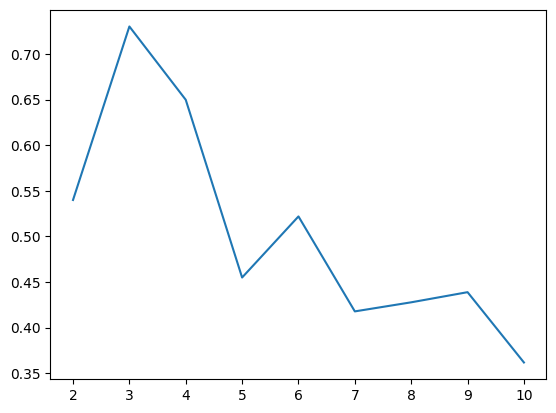

In [63]:
ARI=[]
for k in range(2,11):
  model =KMeans (n_clusters=k,n_init=1)
  labels=model.fit_predict(x1)
  ARI+=[adjusted_rand_score(y, labels)]
plt.plot(np. array(range(2,11)),ARI)

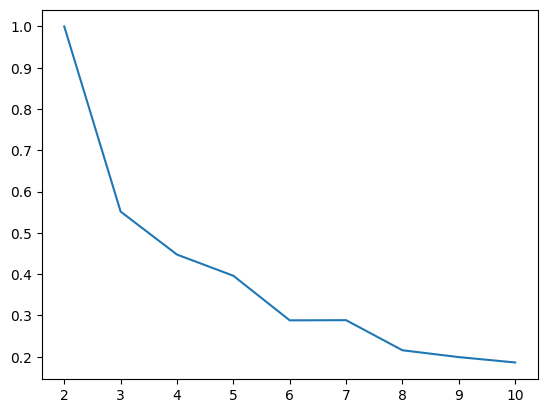

In [65]:
ARI=[]
true=model.fit_predict(x1)
for k in range(2,11):
  model =KMeans (n_clusters=k,n_init=1)
  labels=model.fit_predict(x1)
  ARI+=[adjusted_rand_score(true, labels)]
plt.plot(np. array(range(2,11)),ARI)

## Lab

In [94]:
x, y = make_blobs(n_samples=[150, 200, 150, 250, 250], n_features=15, cluster_std=35, centers = [[50,150],[300,300],[158,175],[408,50],[58,400]],random_state=1)

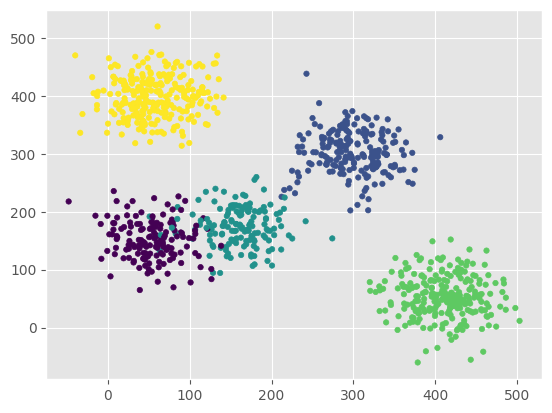

In [96]:
plt.style.use('ggplot')
plt.figure()
plt.scatter(x[:,0], x[:,1], marker='o', c=np.squeeze(y), s=15)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


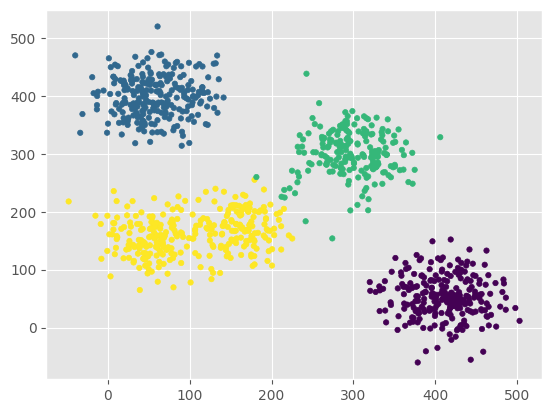

In [97]:
model=KMeans(n_clusters=4)
model.fit(x)
plt.figure()
plt.scatter(x[:,0], x[:,1], marker='o', c=model.labels_, s=15)

In [102]:
from sklearn.metrics import silhouette_score
ss=silhouette_score(x, model.labels_)
print(ss)

0.6895051235260675


In [104]:
dbs=davies_bouldin_score(x, model.labels_)
print(dbs)

0.43618117876748996


In [108]:
rs=rand_score(model.labels_, y)
print(rs)

0.9533853853853854


In [127]:
df={'AG k=3':[],'AG k=4':[], 'AG k=5':[], 'KMeans k=3':[], 'KMeans k=4':[], 'KMeans k=5':[]}
#df=pd.DataFrame(columns=['silhouette_score', 'davies_bouldin_score', 'rand_score', 'adjusted_rand_score', 'mutual_info_score', 'normalized_mutual_info_score'], index=['AG k=3',
#         'AG k=4', 'AG k=5', 'KMeans k=3', 'KMeans k=4', 'KMeans k=5'])
for k in range(3, 6):
  kmeans=KMeans(n_clusters=k)
  ag=AgglomerativeClustering(n_clusters=k)
  kmeans.fit(x)
  ag.fit(x)
  str1='AG k='+str(k)
  str2='KMeans k='+str(k)
  df[str1]=[silhouette_score(x, ag.labels_), davies_bouldin_score(x, ag.labels_), rand_score(ag.labels_, y), adjusted_rand_score(ag.labels_, y),
                        mutual_info_score(ag.labels_, y), normalized_mutual_info_score(ag.labels_, y)]
  df[str2]=[silhouette_score(x, kmeans.labels_), davies_bouldin_score(x, kmeans.labels_), rand_score(kmeans.labels_, y), adjusted_rand_score(kmeans.labels_, y),
                        mutual_info_score(kmeans.labels_, y), normalized_mutual_info_score(kmeans.labels_, y)]
pd.DataFrame(df, index=['silhouette_score', 'davies_bouldin_score', 'rand_score', 'adjusted_rand_score', 'mutual_info_score', 'normalized_mutual_info_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,AG k=3,AG k=4,AG k=5,KMeans k=3,KMeans k=4,KMeans k=5
silhouette_score,0.555764,0.689265,0.653201,0.555792,0.689505,0.658677
davies_bouldin_score,0.709962,0.438377,0.513582,0.713954,0.436181,0.500027
rand_score,0.834835,0.950983,0.982855,0.834336,0.953385,0.988695
adjusted_rand_score,0.613141,0.862914,0.948196,0.611187,0.869292,0.965810
mutual_info_score,1.039721,1.354930,1.479867,1.024856,1.359338,1.506404
normalized_mutual_info_score,0.792503,0.915893,0.934337,0.780562,0.917866,0.950587
